In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
glasses = pd.read_csv('glass source classification dataset.csv')

In [151]:
glasses.head()


,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,NaN,Does not exist,Does not exist,building_window glass
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,Does not exist,Does not exist,building_window glass
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,Does not exist,Does not exist,building_window glass
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,NaN,Does not exist,Does not exist,building_window glass
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,Does not exist,Does not exist,building_window glass


In [152]:
glasses.shape

(214, 11)

In [153]:
glasses.isnull().sum()

Unnamed: 0    0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            6
Ba            0
Fe            0
Type          0
dtype: int64

In [154]:
glasses1=glasses.dropna(axis=0)

In [155]:
glasses1.isnull().sum()

Unnamed: 0    0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Type          0
dtype: int64

In [156]:
glasses1['Type'].unique()

array(['building_window glass', 'vehicle_window glass', 'container glass',
       'tableware glass', 'headlamp glass'], dtype=object)

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
le= LabelEncoder()

In [159]:
glasses1['Ba'].unique()
glasses1['Ba']=le.fit_transform(glasses1['Ba'])

C:\Users\Ridwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
glasses1['Fe'].unique()
glasses1['Fe']=le.fit_transform(glasses1['Fe'])

C:\Users\Ridwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [161]:
x=glasses1.drop('Type',1)

In [162]:
glasses1.reset_index(drop=True, inplace=True)

In [163]:
x.keys()

Index(['Unnamed: 0', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [164]:
y=glasses1['Type']

In [165]:
y

0      building_window glass
1      building_window glass
2      building_window glass
3      building_window glass
4      building_window glass
               ...          
203           headlamp glass
204           headlamp glass
205           headlamp glass
206           headlamp glass
207           headlamp glass
Name: Type, Length: 208, dtype: object

In [166]:
glasses1['Type']=le.fit_transform(glasses1['Type'])

C:\Users\Ridwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
x.keys()

Index(['Unnamed: 0', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [168]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [169]:
glass_df= pd.DataFrame(scaler.fit_transform(x), columns=['0','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DC037A5408>,
      dtype=object)

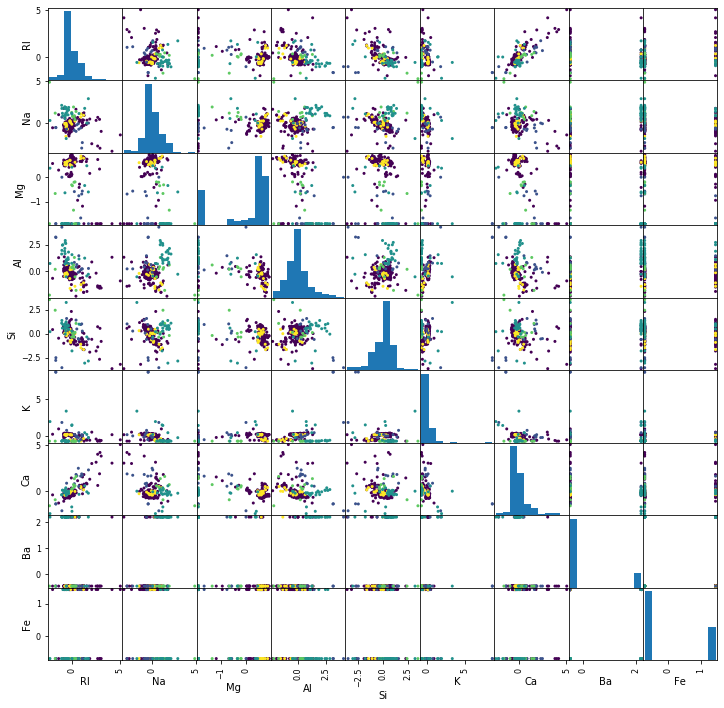

In [170]:
from pandas.plotting import scatter_matrix
scatter_matrix(glass_df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']] ,c=glasses1['Type'], figsize=(12,12), alpha=1)

In [171]:
#Lets split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(glass_df, y, stratify=y, test_size=0.2)

In [172]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set: x->(166, 10) , y->(166,) 
 Testing set: x->(42, 10) , y->(42,)


In [173]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [174]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
a1st=svc.score(x_test, y_test)

Training accuracy of the model is 0.99
Testing accuracy of the model is 0.90


In [175]:
predictions = svc.predict(x_test)
print(predictions)

['building_window glass' 'building_window glass' 'building_window glass'
 'building_window glass' 'building_window glass' 'vehicle_window glass'
 'vehicle_window glass' 'building_window glass' 'building_window glass'
 'building_window glass' 'building_window glass' 'tableware glass'
 'vehicle_window glass' 'building_window glass' 'vehicle_window glass'
 'building_window glass' 'headlamp glass' 'building_window glass'
 'building_window glass' 'container glass' 'container glass'
 'building_window glass' 'building_window glass' 'container glass'
 'building_window glass' 'headlamp glass' 'building_window glass'
 'building_window glass' 'building_window glass' 'vehicle_window glass'
 'building_window glass' 'building_window glass' 'building_window glass'
 'container glass' 'headlamp glass' 'building_window glass'
 'headlamp glass' 'building_window glass' 'building_window glass'
 'building_window glass' 'building_window glass' 'vehicle_window glass']


In [176]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[27  0  0  0  0]
 [ 0  3  0  1  0]
 [ 0  0  4  0  0]
 [ 0  0  0  1  0]
 [ 2  0  1  0  3]]


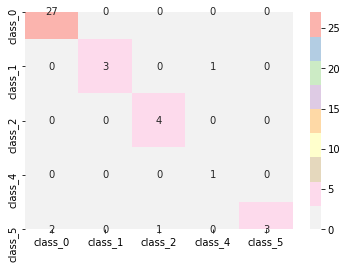

In [177]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2','class_4' ,'class_5'], yticklabels=['class_0' ,'class_1', 'class_2','class_4' ,'class_5'], annot=True)

In [178]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [179]:
nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [180]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
a2nd=nnc.score(x_test, y_test)

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.81


In [181]:
predictions = nnc.predict(x_test)
print(predictions)

['building_window glass' 'building_window glass' 'building_window glass'
 'building_window glass' 'building_window glass' 'vehicle_window glass'
 'vehicle_window glass' 'building_window glass' 'building_window glass'
 'building_window glass' 'building_window glass' 'tableware glass'
 'vehicle_window glass' 'building_window glass' 'vehicle_window glass'
 'building_window glass' 'headlamp glass' 'building_window glass'
 'building_window glass' 'container glass' 'container glass'
 'building_window glass' 'building_window glass' 'container glass'
 'building_window glass' 'headlamp glass' 'building_window glass'
 'vehicle_window glass' 'building_window glass' 'vehicle_window glass'
 'container glass' 'vehicle_window glass' 'building_window glass'
 'building_window glass' 'headlamp glass' 'building_window glass'
 'headlamp glass' 'building_window glass' 'building_window glass'
 'building_window glass' 'building_window glass' 'vehicle_window glass']


In [182]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
a3rd=rfc.score(x_test, y_test)

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.98


In [184]:
predictions = rfc.predict(x_test)

In [185]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)

In [186]:
principal_components= pca.fit_transform(x)
print(principal_components)

[[-1.05638771e+02 -6.48814635e-01  1.25367091e+00 -6.05311811e-01
   4.10616651e-01]
 [-1.04639214e+02 -6.42680548e-01  1.33434816e+00 -2.95426314e-01
   1.24639570e-01]
 [-1.02642337e+02 -4.11825984e-01  1.07666505e+00 -6.73482571e-02
  -4.87219317e-02]
 ...
 [ 1.04395375e+02 -1.72951882e-01  1.60597916e+00 -3.90835351e-01
  -3.30790964e-01]
 [ 1.05395214e+02 -1.55707339e-01  1.64726283e+00 -3.91962844e-01
  -5.03404370e-01]
 [ 1.06395026e+02 -1.63235760e-02  1.47269368e+00 -2.96982399e-01
  -3.21189215e-01]]


In [187]:
pca.explained_variance_ratio_

array([9.98550027e-01, 7.08202677e-04, 2.68026979e-04, 1.79937930e-04,
       1.68941128e-04])

In [188]:
sum(pca.explained_variance_ratio_)

0.9998751352959705

In [189]:
principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2","principle component 3", "principle component 4","principle component 5"])
#principal_df.head()
main_df=pd.concat([principal_df, y], axis=1)

In [190]:
main_df.head()

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,Type
0,-105.638771,-0.648815,1.253671,-0.605312,0.410617,building_window glass
1,-104.639214,-0.642681,1.334348,-0.295426,0.124640,building_window glass
2,-102.642337,-0.411826,1.076665,-0.067348,-0.048722,building_window glass
3,-101.644183,-0.347585,0.912453,0.433637,0.035749,building_window glass
4,-100.642342,-0.334215,1.026593,-0.091664,-0.070243,building_window glass


In [191]:
X= main_df.drop("Type" , axis=1)
y= main_df["Type"]

In [192]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [193]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set: x->(166, 5) , y->(166,) 
 Testing set: x->(42, 5) , y->(42,)


In [194]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [195]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
a4th=svc.score(x_test, y_test)

Training accuracy of the model is 1.00
Testing accuracy of the model is 0.95


In [196]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [197]:
nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [198]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
a5th=nnc.score(x_test, y_test)

The Training accuracy of the model is 0.95
The Testing accuracy of the model is 0.93


In [199]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
a6th=rfc.score(x_test, y_test)

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.95


No handles with labels found to put in legend.


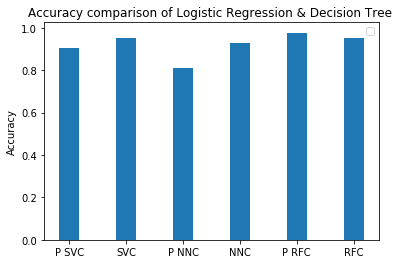

In [205]:
labels = ['P SVC','SVC', 'P NNC','NNC',"P RFC","RFC"]
men_means = [a1st,a4th,a2nd,a5th,a3rd,a6th]



width = .35 

fig, ax = plt.subplots()

ax.bar(labels, men_means, width)


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparison of Logistic Regression & Decision Tree ')
ax.legend()

plt.show()

In [206]:
print(a1st,a4th,a2nd,a5th,a3rd,a6th)

0.9047619047619048 0.9523809523809523 0.8095238095238095 0.9285714285714286 0.9761904761904762 0.9523809523809523
